# Removing multicollinearity 

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('./NutritionalFacts_Fruit_Vegetables_Seafood.xlsx')

In [3]:
data.head(1)

,Food and Serving,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,...,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ,Saturated Fat,Saturated Fat.1,Chole-sterol,Chole-sterol.1,Food Type
0,"Asparagus, 5 spears (93 g/3.3 oz)",20,0,0.0,0,0,0,230,7,4,...,2,10,15,2,2,NaN,NaN,NaN,NaN,"Vegetables, Serving Size (gram weight/Êounce w..."


In [4]:
# for checking categorical values
data.info()

data=data.iloc[:,1:19]

data.info()

# checking and dropping null values
data.isnull().sum()

data.dropna(inplace=True)

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Food and Serving       61 non-null     object 
 1   Calories               61 non-null     int64  
 2   CaloriesÊfrom Fat      61 non-null     int64  
 3   Total Fat              61 non-null     float64
 4   Total Fat.1            61 non-null     int64  
 5   Sodium                 61 non-null     int64  
 6   Sodium.1               61 non-null     int64  
 7   Potassium              61 non-null     int64  
 8   Potassium.1            61 non-null     int64  
 9   Total Carbo-hydrate    61 non-null     int64  
 10  Total Carbo-hydrate.1  61 non-null     int64  
 11  Dietary Fiber          40 non-null     float64
 12  Dietary Fiber.1        40 non-null     float64
 13  Sugars                 40 non-null     float64
 14  Protein                61 non-null     int64  
 15  Vitamin 

Calories                 0
CaloriesÊfrom Fat        0
Total Fat                0
Total Fat.1              0
Sodium                   0
Sodium.1                 0
Potassium                0
Potassium.1              0
Total Carbo-hydrate      0
Total Carbo-hydrate.1    0
Dietary Fiber            0
Dietary Fiber.1          0
Sugars                   0
Protein                  0
Vitamin A                0
Vitamin C                0
Calcium                  0
ÊÊIronÊÊ                 0
dtype: int64

In [6]:
data.shape

(40, 18)

In [10]:
# Correlation matrix

corrMatrix = data.corr()

In [11]:
corrMatrix

,Calories,CaloriesÊfrom Fat,Total Fat,Total Fat.1,Sodium,Sodium.1,Potassium,Potassium.1,Total Carbo-hydrate,Total Carbo-hydrate.1,Dietary Fiber,Dietary Fiber.1,Sugars,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
Calories,1.000000,0.137547,0.127434,0.138895,-0.268346,-0.209619,0.554223,0.546641,0.974708,0.974311,0.517220,0.517220,0.774008,0.236040,-0.025853,0.038111,-0.027385,0.033156
CaloriesÊfrom Fat,0.137547,1.000000,0.988787,0.985470,-0.167383,-0.151301,-0.045392,-0.048936,-0.047411,-0.049193,-0.063654,-0.063654,-0.141010,0.203664,-0.117153,-0.034632,-0.290843,-0.028551
Total Fat,0.127434,0.988787,1.000000,0.997725,-0.132446,-0.121431,-0.034809,-0.037555,-0.061181,-0.062595,-0.067384,-0.067384,-0.152251,0.247637,-0.122799,-0.023746,-0.280604,0.012372
Total Fat.1,0.138895,0.985470,0.997725,1.000000,-0.131013,-0.120579,-0.009963,-0.012921,-0.049878,-0.050329,-0.047987,-0.047987,-0.140617,0.259185,-0.128329,0.010951,-0.269400,0.021670
Sodium,-0.268346,-0.167383,-0.132446,-0.131013,1.000000,0.979952,0.206176,0.181263,-0.277408,-0.279401,-0.022596,-0.022596,-0.301621,0.065358,0.370064,0.156913,0.361153,0.353179
Sodium.1,-0.209619,-0.151301,-0.121431,-0.120579,0.979952,1.000000,0.227219,0.200765,-0.215723,-0.220753,0.014525,0.014525,-0.240068,0.015004,0.389905,0.163385,0.358986,0.309919
Potassium,0.554223,-0.045392,-0.034809,-0.009963,0.206176,0.227219,1.000000,0.996023,0.504106,0.520520,0.285860,0.285860,0.174004,0.551403,0.091467,0.276350,0.164813,0.583873
Potassium.1,0.546641,-0.048936,-0.037555,-0.012921,0.181263,0.200765,0.996023,1.000000,0.495919,0.513365,0.258185,0.258185,0.170204,0.559473,0.108303,0.265288,0.148842,0.575590
Total Carbo-hydrate,0.974708,-0.047411,-0.061181,-0.049878,-0.277408,-0.215723,0.504106,0.495919,1.000000,0.995781,0.525530,0.525530,0.839114,0.120879,-0.040701,-0.004346,-0.030909,-0.032551
Total Carbo-hydrate.1,0.974311,-0.049193,-0.062595,-0.050329,-0.279401,-0.220753,0.520520,0.513365,0.995781,1.000000,0.527120,0.527120,0.824045,0.131977,-0.040085,0.009897,-0.015457,-0.003530


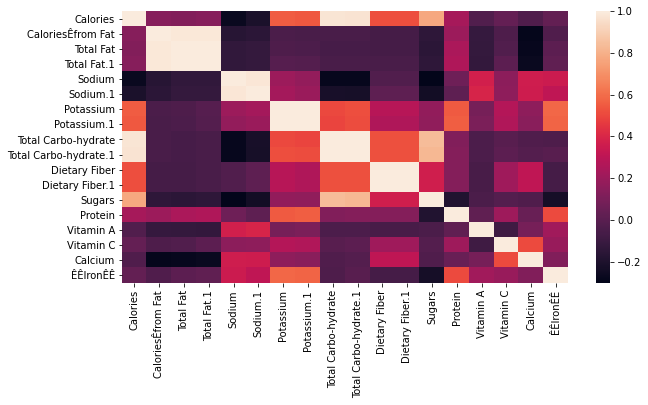

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(corrMatrix)
plt.show()

In [15]:
# creating a user defined function for checing the correlation between input variables

def checkCorr(data, threshold):
    correlated_cols=set()
    corrMatrix= data.corr()
    for cols in range(len(data.columns)):
        for rows in range(cols):
            if abs(corrMatrix.iloc[cols,rows])> threshold:
                colname = corrMatrix.columns[cols]
                correlated_cols.add(colname)
    return correlated_cols

In [20]:
checkCorr(data, 0.8)

{'Dietary Fiber.1',
 'Potassium.1',
 'Sodium.1',
 'Sugars',
 'Total Carbo-hydrate',
 'Total Carbo-hydrate.1',
 'Total Fat',
 'Total Fat.1'}

In [21]:
featuresToRemove = checkCorr(data,0.8)

In [22]:
featuresToRemove

{'Dietary Fiber.1',
 'Potassium.1',
 'Sodium.1',
 'Sugars',
 'Total Carbo-hydrate',
 'Total Carbo-hydrate.1',
 'Total Fat',
 'Total Fat.1'}

In [23]:
# removing highly correlated columns

data.drop(labels=featuresToRemove, axis = 1, inplace = True)

In [25]:
data.shape

(40, 10)

In [26]:
data.head()

,Calories,CaloriesÊfrom Fat,Sodium,Potassium,Dietary Fiber,Protein,Vitamin A,Vitamin C,Calcium,ÊÊIronÊÊ
0,20,0,0,230,2.0,2,10,15,2,2
1,25,0,40,220,2.0,1,4,190,2,4
2,45,0,80,460,3.0,4,6,220,6,6
3,30,0,60,250,2.0,1,110,10,2,2
4,25,0,30,270,2.0,2,0,100,2,2
